#### Disclaimer: While case study is real, data is modified for educational purposes. 

Description: The PlantVillage dataset consists of healthy and unhealthy leaf images divided into 38 categories by species and disease.

#### You are asked to train a model with following steps:
1. Classify image data
2. Find optimal learning rate
3. Evaluate loss and accuracy
4. See most confused classes (confusion matrix and top confused pictures)
5. Save model

In [9]:
from fastai.vision.all import *

data_dir = r'C:\Users\Administrator\Desktop\DSA_Bootcamp26\Week 11\Python\HW_CS\plant_leave_diseases_dataset_with_augmentation (W11D2_CS)'

epoch,train_loss,valid_loss,accuracy,time
0,0.332371,0.174475,0.942750,3:10:37


epoch,train_loss,valid_loss,accuracy,time
0,0.087523,0.057631,0.980808,3:46:37
1,0.047964,0.023300,0.992112,3:35:16


                                               precision    recall  f1-score   support

                           Apple___Apple_scab       1.00      0.98      0.99       199
                            Apple___Black_rot       0.99      1.00      0.99       209
                     Apple___Cedar_apple_rust       1.00      1.00      1.00       199
                              Apple___healthy       0.99      1.00      1.00       339
                    Background_without_leaves       1.00      1.00      1.00       232
                          Blueberry___healthy       1.00      1.00      1.00       294
                      Cherry___Powdery_mildew       1.00      1.00      1.00       193
                             Cherry___healthy       1.00      1.00      1.00       225
   Corn___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.97      0.97       202
                           Corn___Common_rust       1.00      1.00      1.00       233
                  Corn___Northern_Leaf_Bli

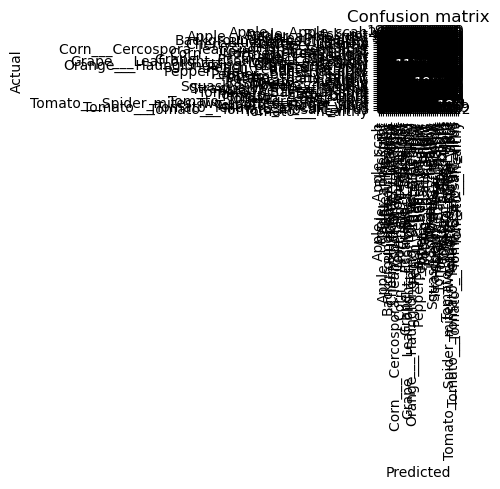

In [10]:
data = ImageDataLoaders.from_folder(data_dir, valid_pct=0.2, seed=42, bs=64,
                                    item_tfms=Resize(224),
                                    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)])

learn = cnn_learner(data, resnet34, metrics=accuracy)

lr_fixed = 1e-3

learn.fine_tune(2, base_lr=lr_fixed)

interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()

interp.plot_confusion_matrix()

# top confused images
interp.most_confused(min_val=5)

learn.export('(W11D2_CS) plant_disease_resnet_model.pkl')